In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


d_t = pd.read_csv('QVI_purchase_behaviour.csv')
print(d_t.head())

d_p = pd.read_csv('QVI_transaction_data.csv')
print(d_p.head())

   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&On

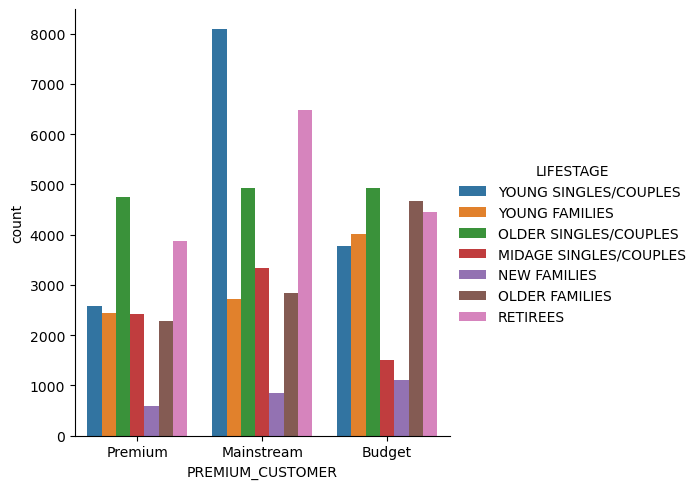

In [3]:
sns.catplot(x = 'PREMIUM_CUSTOMER', data = d_t, kind = 'count', hue = 'LIFESTAGE')
plt.show()

In [4]:
d_p['Quantity of Chips'] = d_p['PROD_NAME'].str.replace(r'.*?(\d+[gG]).*', r'\1', regex = True)
print(d_p['Quantity of Chips'].sort_values().value_counts())

Quantity of Chips
175g    64929
150g    41633
134g    25102
110g    22387
170g    19983
165g    15297
300g    15166
330g    12540
380g     6418
270g     6285
200g     4473
135g     3257
250g     3169
210g     3167
210G     3105
90g      3008
190g     2995
160g     2970
220g     1564
70g      1507
150G     1498
180g     1468
175G     1461
125g     1454
Name: count, dtype: int64


In [5]:
data = d_t.merge(d_p, on = 'LYLTY_CARD_NBR', how = 'inner')
print(data.isna().sum())

LYLTY_CARD_NBR       0
LIFESTAGE            0
PREMIUM_CUSTOMER     0
DATE                 0
STORE_NBR            0
TXN_ID               0
PROD_NBR             0
PROD_NAME            0
PROD_QTY             0
TOT_SALES            0
Quantity of Chips    0
dtype: int64


In [6]:
data['brand'] = data['PROD_NAME']
print(data)

        LYLTY_CARD_NBR              LIFESTAGE PREMIUM_CUSTOMER   DATE  \
0                 1000  YOUNG SINGLES/COUPLES          Premium  43390   
1                 1002  YOUNG SINGLES/COUPLES       Mainstream  43359   
2                 1003         YOUNG FAMILIES           Budget  43531   
3                 1003         YOUNG FAMILIES           Budget  43532   
4                 1004  OLDER SINGLES/COUPLES       Mainstream  43406   
...                ...                    ...              ...    ...   
264831         2370701         YOUNG FAMILIES       Mainstream  43442   
264832         2370751         YOUNG FAMILIES          Premium  43374   
264833         2370961         OLDER FAMILIES           Budget  43397   
264834         2370961         OLDER FAMILIES           Budget  43400   
264835         2373711  YOUNG SINGLES/COUPLES       Mainstream  43448   

        STORE_NBR  TXN_ID  PROD_NBR                                 PROD_NAME  \
0               1       1         5    Nat

In [7]:
import pandas as pd
import re

# Assuming df is the DataFrame with the 'brand' column
# Replace weights (e.g., 175g, 150g, 210G) with empty string
data['brand_cleaned'] = data['brand'].str.replace(r'\d+[gG]', '', regex=True)

# Replace common descriptive words and patterns (e.g., flavors, types) with empty string
# This targets common chip-related descriptors seen in the sample data
data['brand_cleaned'] = data['brand_cleaned'].str.replace(r'\s*(Chips|Corn|Crinkle|Cut|Thinly|Stacked|Popd|Tortilla|Crisps|Crnchers|Strws|Papadums|Salsa|Dip|Supreme|Original|Salt|Salted|Vinegar|Cream|Chilli|Chili|Chicken|Sour|S/Cream|Cheese|BBQ|Barbecue|Camembert|Fig|Siracha|Lime|Maple|Tomato|Mild|Medium|Med|Nacho|French|Onion|Onin|Chs|Swt|Sweet|Spcy|Spice|Hrb|Herbs|Jlpno|Jalapeno|Chutny|Rib|Prawn|Whlegrn|Whlgrn|Frch|Mstrd|Btroot|Ricotta|Chikn|Garlic|Aioli|Hony|Soy|Chckn|Snag|Sauce|Mzzrlla|Mozzarella|Basil|Pesto|Thai|Coconut|Light|Tangy|Ched|Chives|Bolognese|Smoked|Chipotle|Pepper|Steak|Chimuchurri|Mac|Burger|Rings|Box|Sthrn|Fried|Potato|Pot|And|&)\s*', ' ', regex=True)

# Clean up extra spaces and get the core brand name
data['brand_cleaned'] = data['brand_cleaned'].str.replace(r'\s+', ' ', regex=True).str.strip()

print(data['brand_cleaned'])

0          Natural Chip Compny Sea
1                    Red Rock Deli
2                      Grain Waves
3                   Natural ChipCo
4                               WW
                    ...           
264831                 Grain Waves
264832             Kettle ChpsFeta
264833              Tyrrells ly ed
264834    Old El Paso Chnky Tom Ht
264835                      Smiths
Name: brand_cleaned, Length: 264836, dtype: object


In [8]:
list_brands = ['Natural Chip Company', 'Red Rock Deli', 'Grain Waves', 'Woolworths', 
               'Cheetos', 'Infuzions', 'Doritos', 
               'Old El Paso', 'Smiths', 'Kettle', 'Tostitos', 
               'CCs', 'Tyrrells', 'Thins', 'Twisties', 'Sunbites', 
               'Cobs', 'Pringles', 'French Fries']

a = '^N|^n'
b = '^R|^r'
c = '^G|^g'
d = '^W|^w'
e = '^Cheetos|^cheetos'
f = '^I|^i'
g = '^D|^d'
h = '^O|^o'
i = '^Smiths|^smiths'
j = '^K|^k'
k = '^Tostitos|^tostitos'
l = '^CCs|^ccs'
m = '^Tyrrells|^tyrrells'
n = '^Thins|^thins'
o = '^Twisties|^twisties'
p = '^Sunbites|^sunbites'
q = '^Cobs|^cobs'
r = '^Pringles|^pringles'
s = '^F|^f'

conditions = (
    (data['brand_cleaned'].str.contains(a)),
    (data['brand_cleaned'].str.contains(b)),
    (data['brand_cleaned'].str.contains(c)),
    (data['brand_cleaned'].str.contains(d)),
    (data['brand_cleaned'].str.contains(e)),
    (data['brand_cleaned'].str.contains(f)),
    (data['brand_cleaned'].str.contains(g)),
    (data['brand_cleaned'].str.contains(h)),
    (data['brand_cleaned'].str.contains(i)),
    (data['brand_cleaned'].str.contains(j)),
    (data['brand_cleaned'].str.contains(k)),
    (data['brand_cleaned'].str.contains(l)),
    (data['brand_cleaned'].str.contains(m)),
    (data['brand_cleaned'].str.contains(n)),
    (data['brand_cleaned'].str.contains(o)),
    (data['brand_cleaned'].str.contains(p)),
    (data['brand_cleaned'].str.contains(q)),
    (data['brand_cleaned'].str.contains(r)),
    (data['brand_cleaned'].str.contains(s))
)

data['brand_name'] = np.select(conditions, 
                              list_brands, 
                              default = 'None')

del(data['brand'], data['brand_cleaned'])

print(data.head(10))


   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER   DATE  STORE_NBR  \
0            1000   YOUNG SINGLES/COUPLES          Premium  43390          1   
1            1002   YOUNG SINGLES/COUPLES       Mainstream  43359          1   
2            1003          YOUNG FAMILIES           Budget  43531          1   
3            1003          YOUNG FAMILIES           Budget  43532          1   
4            1004   OLDER SINGLES/COUPLES       Mainstream  43406          1   
5            1005  MIDAGE SINGLES/COUPLES       Mainstream  43462          1   
6            1007   YOUNG SINGLES/COUPLES           Budget  43438          1   
7            1007   YOUNG SINGLES/COUPLES           Budget  43439          1   
8            1009            NEW FAMILIES          Premium  43424          1   
9            1010   YOUNG SINGLES/COUPLES       Mainstream  43352          1   

   TXN_ID  PROD_NBR                                 PROD_NAME  PROD_QTY  \
0       1         5    Natural Chip        C

In [9]:
data['Quantity of Chips'].unique()

array(['175g', '150g', '210G', '160g', '165g', '110g', '330g', '170g',
       '300g', '180g', '135g', '70g', '220g', '190g', '175G', '270g',
       '90g', '200g', '134g', '380g', '150G', '125g', '210g', '250g'],
      dtype=object)

In [10]:
list_weights = ['175g', '150g', '210g', '160g', '165g', '110g', '330g', '170g',
       '300g', '180g', '135g', '70g', '220g', '190g', '270g',
       '90g', '200g', '134g', '380g', '125g', '250g']

a = '^175g|^175G'
b = '^150g|^150G'
c = '^210g|^210G'
d = '^160g'
e = '^165g'
f = '^110g'
g = '^330g'
h = '^170g'
i = '^300g'
j = '^180g'
k = '^135g'
l = '^70g'
m = '^220g'
n = '^190g'
o = '^270g'
p = '^90g'
q = '^200g'
r = '^134g'
s = '^380g'
t = '^125g'
u = '^250g'
conditions1 = (
    (data['Quantity of Chips'].str.contains(a)),
    (data['Quantity of Chips'].str.contains(b)),
    (data['Quantity of Chips'].str.contains(c)),
    (data['Quantity of Chips'].str.contains(d)),
    (data['Quantity of Chips'].str.contains(e)),
    (data['Quantity of Chips'].str.contains(f)),
    (data['Quantity of Chips'].str.contains(g)),
    (data['Quantity of Chips'].str.contains(h)),
    (data['Quantity of Chips'].str.contains(i)),
    (data['Quantity of Chips'].str.contains(j)),
    (data['Quantity of Chips'].str.contains(k)),
    (data['Quantity of Chips'].str.contains(l)),
    (data['Quantity of Chips'].str.contains(m)),
    (data['Quantity of Chips'].str.contains(n)),
    (data['Quantity of Chips'].str.contains(o)),
    (data['Quantity of Chips'].str.contains(p)),
    (data['Quantity of Chips'].str.contains(q)),
    (data['Quantity of Chips'].str.contains(r)),
    (data['Quantity of Chips'].str.contains(s)),
    (data['Quantity of Chips'].str.contains(t)),
    (data['Quantity of Chips'].str.contains(u))
)

data['Chips_Quantity'] = np.select(conditions1, 
                              list_weights, 
                              default = '0g')
del(data['PROD_NAME'])

print(data.head(10))
print(data['Chips_Quantity'].unique())

   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER   DATE  STORE_NBR  \
0            1000   YOUNG SINGLES/COUPLES          Premium  43390          1   
1            1002   YOUNG SINGLES/COUPLES       Mainstream  43359          1   
2            1003          YOUNG FAMILIES           Budget  43531          1   
3            1003          YOUNG FAMILIES           Budget  43532          1   
4            1004   OLDER SINGLES/COUPLES       Mainstream  43406          1   
5            1005  MIDAGE SINGLES/COUPLES       Mainstream  43462          1   
6            1007   YOUNG SINGLES/COUPLES           Budget  43438          1   
7            1007   YOUNG SINGLES/COUPLES           Budget  43439          1   
8            1009            NEW FAMILIES          Premium  43424          1   
9            1010   YOUNG SINGLES/COUPLES       Mainstream  43352          1   

   TXN_ID  PROD_NBR  PROD_QTY  TOT_SALES Quantity of Chips  \
0       1         5         2        6.0              175

In [11]:
del (data['Quantity of Chips'])

In [20]:
data = data.query('PROD_QTY != 200')
data.describe()
data

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,brand_name,Chips_Quantity
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,2,6.0,Natural Chip Company,175g
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,1,2.7,Red Rock Deli,150g
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,1,3.6,Grain Waves,210g
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,1,3.0,Natural Chip Company,175g
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,1,1.9,Woolworths,160g
...,...,...,...,...,...,...,...,...,...,...,...
264831,2370701,YOUNG FAMILIES,Mainstream,43442,88,240378,24,2,7.2,Grain Waves,210g
264832,2370751,YOUNG FAMILIES,Premium,43374,88,240394,60,2,9.2,Kettle,150g
264833,2370961,OLDER FAMILIES,Budget,43397,88,240480,70,2,8.4,Tyrrells,165g
264834,2370961,OLDER FAMILIES,Budget,43400,88,240481,65,2,10.2,Old El Paso,300g


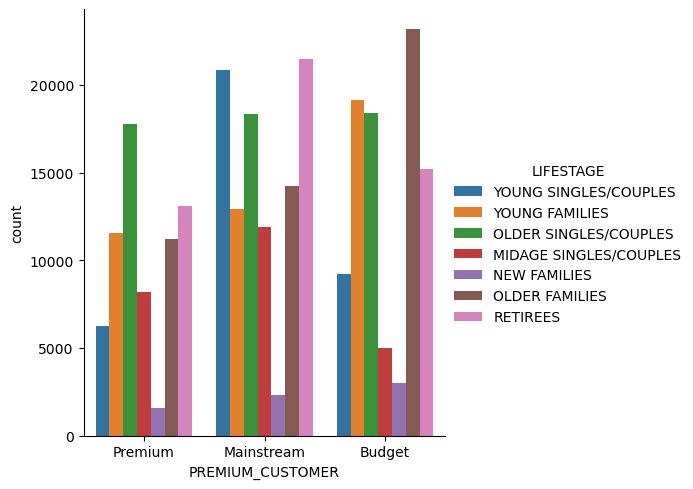

In [13]:
sns.catplot(x = 'PREMIUM_CUSTOMER', data = data, kind = 'count', hue = 'LIFESTAGE')
plt.show()

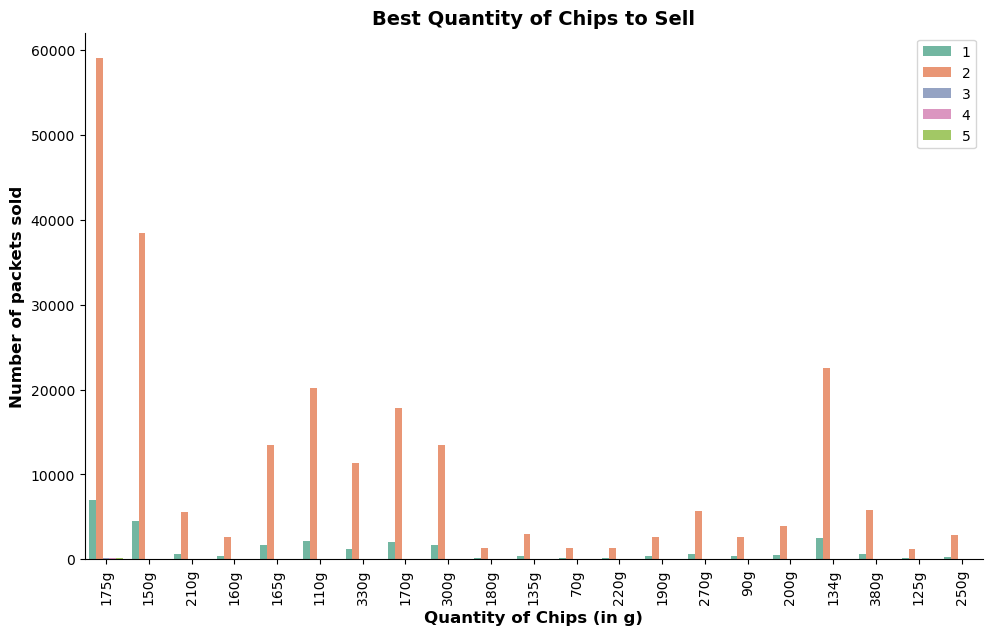

In [14]:
sns.catplot(x = 'Chips_Quantity', data = data, kind = 'count', hue = 'PROD_QTY', legend_out = False, height=6, aspect=1.67, palette = 'Set2')
plt.title('Best Quantity of Chips to Sell', fontsize=14, weight='bold')
plt.xlabel('Quantity of Chips (in g)', fontsize=12, weight='bold')
plt.ylabel('Number of packets sold', fontsize=12, weight='bold')
plt.xticks(rotation = 90)
plt.legend(loc = 'upper right')
plt.show()

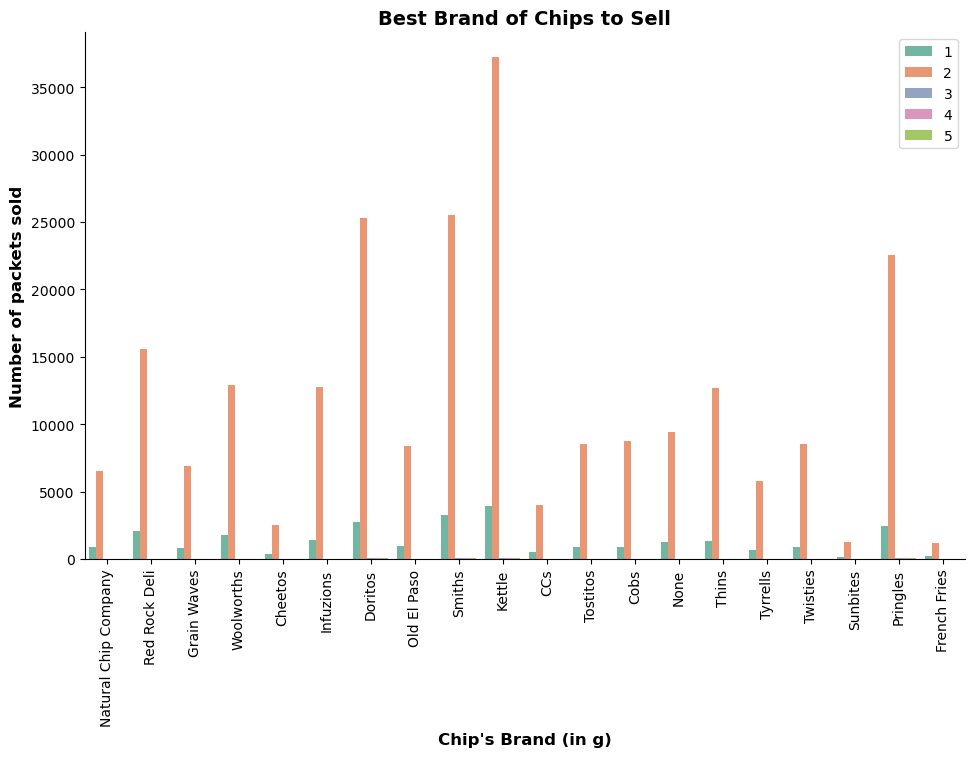

In [15]:
sns.catplot(x = 'brand_name', data = data, kind = 'count', hue = 'PROD_QTY', legend_out = False, height=6, aspect=1.67, palette = 'Set2')
plt.title('Best Brand of Chips to Sell', fontsize=14, weight='bold')
plt.xlabel("Chip's Brand (in g)", fontsize=12, weight='bold')
plt.ylabel('Number of packets sold', fontsize=12, weight='bold')
plt.xticks(rotation = 90)
plt.legend(loc = 'upper right')
plt.show()

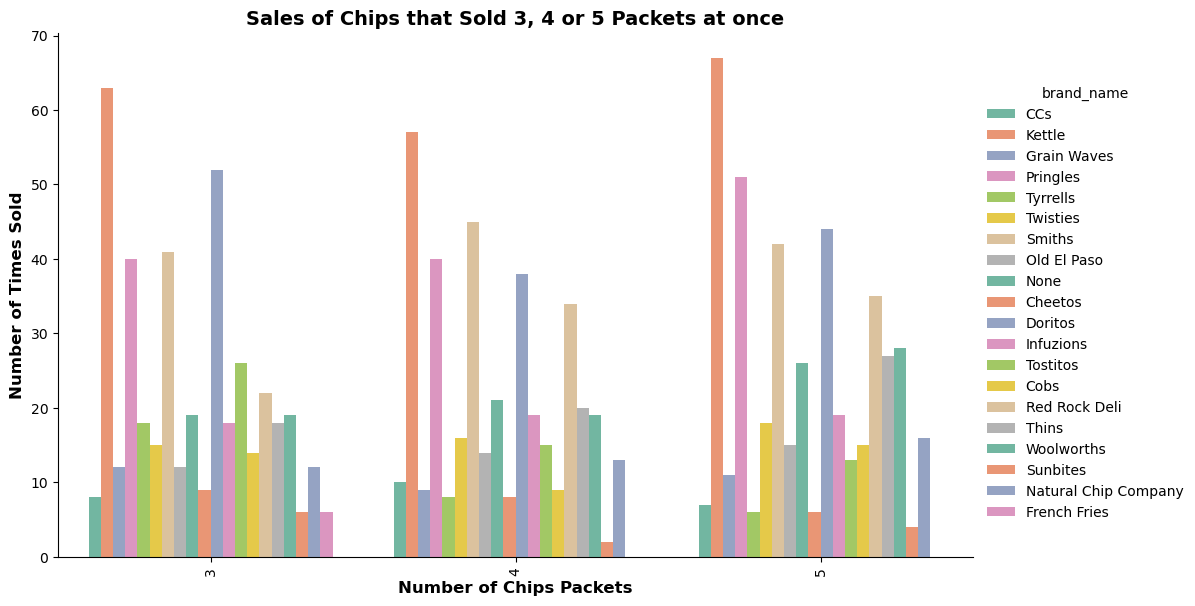

In [17]:
outliers = data[data['PROD_QTY'] > 2]
outliers = outliers.query('PROD_QTY != 200')

sns.catplot(x = 'PROD_QTY', data = outliers, kind= 'count', hue = 'brand_name', palette = 'Set2', height=6, aspect=1.67)
plt.title('Sales of Chips that Sold 3, 4 or 5 Packets at once', fontsize=14, weight='bold')
plt.xlabel("Number of Chips Packets", fontsize=12, weight='bold')
plt.ylabel('Number of Times Sold', fontsize=12, weight='bold')
plt.xticks(rotation = 90)
plt.show()

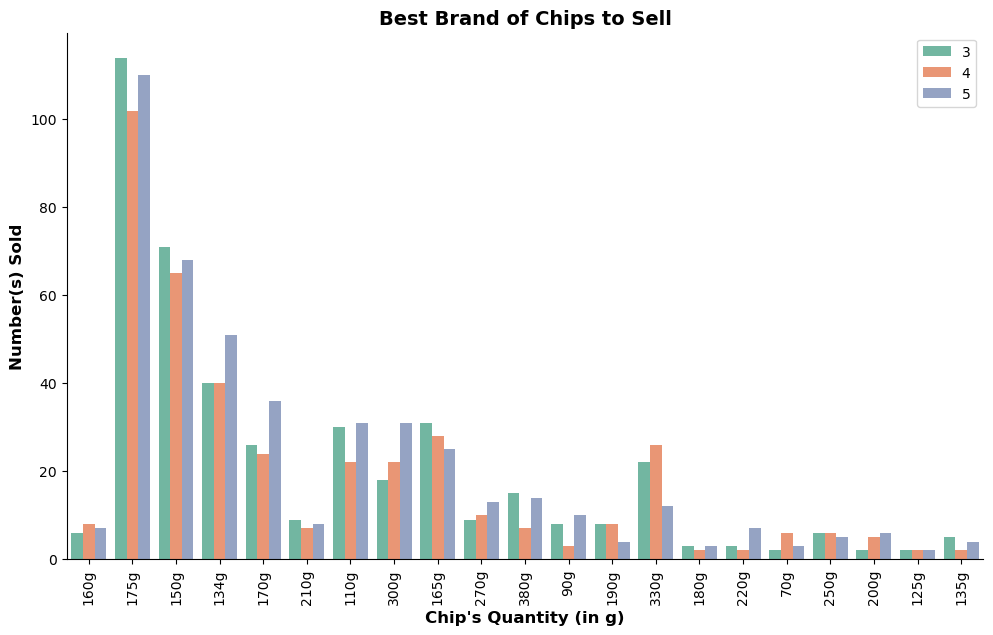

In [18]:
sns.catplot(x = 'Chips_Quantity', data = outliers, kind= 'count', hue = 'PROD_QTY', palette = 'Set2', legend_out = False, height=6, aspect=1.67)
plt.title('Best Brand of Chips to Sell', fontsize=14, weight='bold')
plt.xlabel("Chip's Quantity (in g)", fontsize=12, weight='bold')
plt.ylabel('Number(s) Sold', fontsize=12, weight='bold')
plt.legend(loc = 'upper right')
plt.xticks(rotation = 90)
plt.show()

In [37]:
avg_unit = data.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['TOT_SALES'].agg('mean').sort_values(ascending = False)
print(avg_unit)
# Here since the average is around 2 chips packets per customer, so lets say that each on an avergae for 2 packets of chips the Mainstream with MIDAGE SINGLES/COUPLES lifestage spends $7.647284. 
# Consider the same for all the groups. 

PREMIUM_CUSTOMER  LIFESTAGE             
Mainstream        MIDAGE SINGLES/COUPLES    7.647284
                  YOUNG SINGLES/COUPLES     7.558339
Premium           RETIREES                  7.456174
                  OLDER SINGLES/COUPLES     7.449766
Budget            RETIREES                  7.443445
                  OLDER SINGLES/COUPLES     7.430315
Mainstream        NEW FAMILIES              7.317806
Budget            NEW FAMILIES              7.297321
                  YOUNG FAMILIES            7.287201
Mainstream        OLDER SINGLES/COUPLES     7.282116
Budget            OLDER FAMILIES            7.269570
Premium           YOUNG FAMILIES            7.266756
Mainstream        OLDER FAMILIES            7.262395
                  RETIREES                  7.252262
Premium           NEW FAMILIES              7.231655
                  OLDER FAMILIES            7.208079
Mainstream        YOUNG FAMILIES            7.189025
Premium           MIDAGE SINGLES/COUPLES    7.112056
Budge